In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from currency_converter import CurrencyConverter

In [2]:
API_KEY = "SEOC47M8VXQBHO41"
symbols = ["UBER"]

In [10]:
class Data:

	def __init__(self, key, symbols):
		"""Initialize variables and Alpha Vantage API 
		"""
		self.API_KEY = key
		self.symbols = symbols
		self.timeseries = TimeSeries(key=self.API_KEY, output_format="pandas")
		self.fetch()

	def fetch(self):
		"""Fetch data from TimeSeries object
		"""
		self.data, self.meta = self.timeseries.get_intraday(symbol=self.symbols[0], interval="15min", outputsize="compact")
		print(self.data)

In [11]:
f = Data(API_KEY, symbols)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-11-09 20:00:00  47.6800  47.8700  47.650   47.8100     6689.0
2020-11-09 19:45:00  47.8500  47.8501  47.660   47.8000     1335.0
2020-11-09 19:30:00  47.6700  47.7700  47.660   47.7700     1584.0
2020-11-09 19:15:00  47.8000  47.9600  47.680   47.6800     8213.0
2020-11-09 19:00:00  47.8000  47.8500  47.800   47.8100      824.0
...                      ...      ...     ...       ...        ...
2020-11-06 12:00:00  44.6997  44.8587  44.595   44.7190  1512627.0
2020-11-06 11:45:00  45.0601  45.1850  44.600   44.7100  2078611.0
2020-11-06 11:30:00  44.9900  45.3800  44.930   45.0700  2822194.0
2020-11-06 11:15:00  44.5500  45.1600  44.460   45.0000  3927304.0
2020-11-06 11:00:00  44.4000  44.9700  44.370   44.5465  2795546.0

[100 rows x 5 columns]


In [15]:
# TODO: Current day instead of fix day
day = "2020-11-09"
f.data = f.data[day].sort_index()
f.data = f.data.between_time('10:00', '16:00')

In [34]:
timesteps = f.data.index.to_list()

for index, value in enumerate(timesteps):
    timesteps[index] = str(datetime.datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S').time())[:-3]

timesteps

['10:00',
 '10:15',
 '10:30',
 '10:45',
 '11:00',
 '11:15',
 '11:30',
 '11:45',
 '12:00',
 '12:15',
 '12:30',
 '12:45',
 '13:00',
 '13:15',
 '13:30',
 '13:45',
 '14:00',
 '14:15',
 '14:30',
 '14:45',
 '15:00',
 '15:15',
 '15:30',
 '15:45',
 '16:00']

In [35]:
f.data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-11-09 10:00:00,49.5200,49.580,47.6000,47.8100,5262050.0
2020-11-09 10:15:00,47.8100,48.110,47.3000,47.9400,2778818.0
2020-11-09 10:30:00,47.9400,48.990,47.9400,48.9250,2310890.0
2020-11-09 10:45:00,48.9200,49.250,48.5900,48.7700,2679024.0
2020-11-09 11:00:00,48.7720,48.880,48.3500,48.3850,1687694.0
2020-11-09 11:15:00,48.3900,48.800,48.3200,48.3839,2102718.0
2020-11-09 11:30:00,48.3900,48.870,48.3900,48.6600,2675875.0
2020-11-09 11:45:00,48.6700,48.955,48.5600,48.7600,2157109.0
2020-11-09 12:00:00,48.7600,49.010,48.7550,48.9800,2000627.0


In [36]:
converter = CurrencyConverter()

for column in f.data:
    for index, value in enumerate(f.data[column]):
        f.data[column].iloc[index] = round(converter.convert(value, "USD", "EUR"), 2)

In [37]:
f.data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-11-09 10:00:00,42.50,42.55,40.85,41.03,4516005.84
2020-11-09 10:15:00,41.03,41.29,40.59,41.14,2384842.09
2020-11-09 10:30:00,41.14,42.04,41.14,41.99,1983256.09
2020-11-09 10:45:00,41.98,42.27,41.70,41.86,2299196.70
2020-11-09 11:00:00,41.86,41.95,41.50,41.53,1448415.72
2020-11-09 11:15:00,41.53,41.88,41.47,41.52,1804598.35
2020-11-09 11:30:00,41.53,41.94,41.53,41.76,2296494.16
2020-11-09 11:45:00,41.77,42.01,41.68,41.85,1851277.89
2020-11-09 12:00:00,41.85,42.06,41.84,42.04,1716981.63


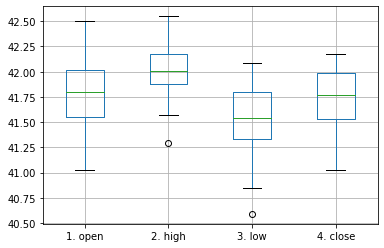

In [38]:
f.data[["1. open", "2. high", "3. low", "4. close"]].boxplot()

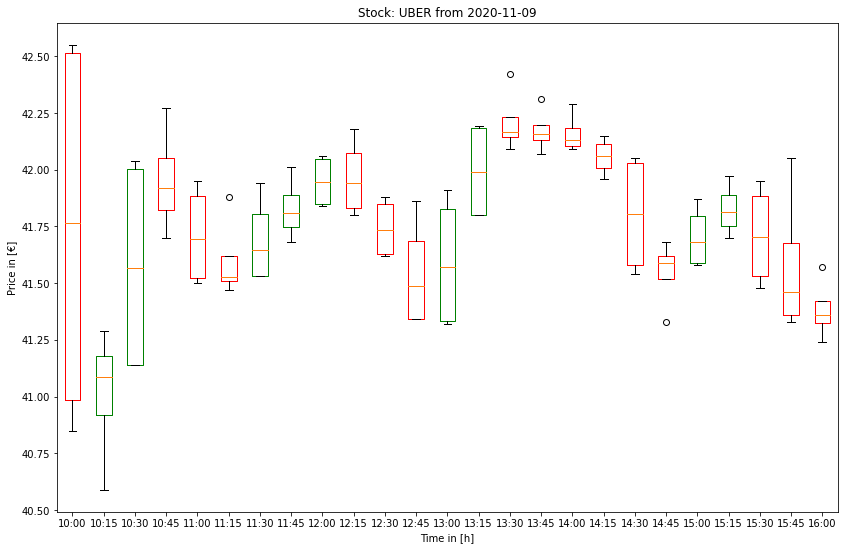

In [80]:
stock_boxplot_day = plt.boxplot(f.data[["1. open", "2. high", "3. low", "4. close"]], labels=timesteps)

for box in range(len(f.data.index)):
    if (f.data.iloc[box, 0] - f.data.iloc[box, 3]) >= 0:
        # Negative trend (low is lower or equal than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "red")
    else:
        # Positive trend (low is higher than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "green")
        
# for index, label in enumerate(plt.xaxis.get_ticklabels()):
#     if index % 4 != 0:
#         label.set_visible(False)
        
plt.title("Stock: {} from {}".format(symbols[0], day))
plt.xlabel("Time in [h]")
plt.ylabel("Price in [€]")

plt.show()

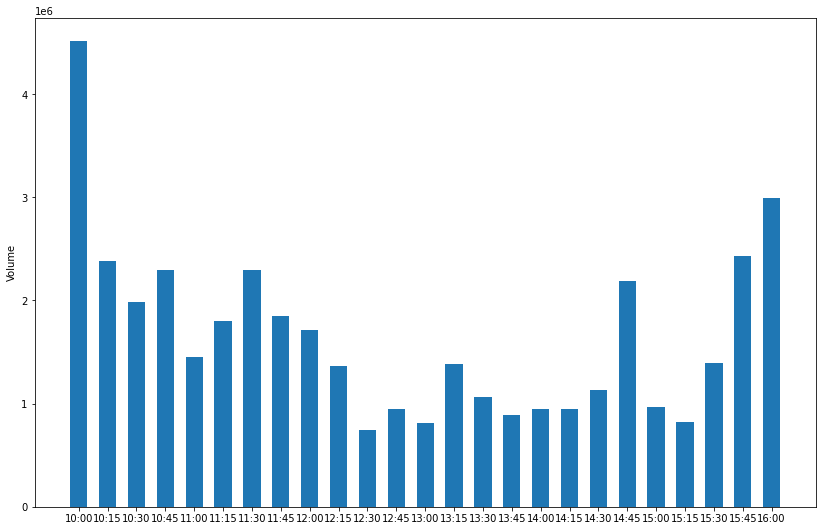

In [71]:
plt.bar(timesteps, f.data["5. volume"], width=0.6)
plt.ylabel("Volume")
plt.show()    